## Purpos of the analysis
### We will fill this shortly

In [1]:
# import the libraris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import the dataset
df = pd.read_csv("./Balloon Race Data Breaches - LATEST - breaches.csv")


In [3]:
# Explore the data (composition)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   organisation       417 non-null    object 
 1   alternative name   144 non-null    object 
 2   records lost       417 non-null    object 
 3   year               417 non-null    int64  
 4   date               417 non-null    object 
 5   story              411 non-null    object 
 6   sector             417 non-null    object 
 7   method             417 non-null    object 
 8   interesting story  85 non-null     object 
 9   data sensitivity   416 non-null    float64
 10  displayed_records  74 non-null     object 
 11  source_name        417 non-null    object 
 12  1st_source link    416 non-null    object 
 13  2nd_source link    32 non-null     object 
 14  ID                 417 non-null    int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 49.0+ KB


In [4]:
df.head()

,organisation,alternative name,records lost,year,date,story,sector,method,interesting story,data sensitivity,displayed_records,source_name,1st_source link,2nd_source link,ID
0,Plex,NaN,"15,000,000",2022,Aug 2022,"Intruders access password data, usernames, and...",web,hacked,NaN,1.0,NaN,Ars technica,https://arstechnica.com/information-technology...,NaN,418
1,Twitter,NaN,"5,400,000",2021,Dec 2021,Zero day vulnerability allowed a threat actor ...,web,hacked,NaN,2.0,NaN,Bleeping Computer,https://www.bleepingcomputer.com/news/security...,NaN,419
2,Shanghai Police,NaN,"500,000,000",2022,Jul 2022,A database containing records of over a billio...,financial,hacked,NaN,5.0,"""one billion""",The Register,https://www.theregister.com/2022/07/05/shangha...,NaN,420
3,"City of Amagasaki, Japan",NaN,"500,000",2022,Jun 2022,An unnamed government official lost his bag af...,government,oops!,NaN,3.0,NaN,BBC,https://www.bbc.co.uk/news/world-asia-61921222,NaN,421
4,Dubai Real Estate Leak,NaN,"800,000",2022,May 2022,"Data leak exposes how criminals, officials, an...",financial,inside job,y,1.0,NaN,E24,https://e24.no/internasjonal-oekonomi/i/Bj97B0...,NaN,417


In [5]:
# all columns
df.columns

Index(['organisation', 'alternative name', 'records lost', 'year', 'date',
       'story', 'sector', 'method', 'interesting story', 'data sensitivity',
       'displayed_records', 'source_name', '1st_source link',
       '2nd_source link', 'ID'],
      dtype='object')

In [6]:
# all columns data types
df.dtypes

organisation          object
alternative name      object
records lost          object
year                   int64
date                  object
story                 object
sector                object
method                object
interesting story     object
data sensitivity     float64
displayed_records     object
source_name           object
1st_source link       object
2nd_source link       object
ID                     int64
dtype: object

In [7]:
df.describe()

,year,data sensitivity,ID
count,417.000000,416.000000,417.000000
mean,2015.215827,2.338942,210.529976
std,4.307467,1.235235,121.231936
min,2004.000000,1.000000,2.000000
25%,2012.000000,1.000000,106.000000
50%,2016.000000,2.000000,210.000000
75%,2019.000000,3.000000,315.000000
max,2022.000000,5.000000,421.000000


In [8]:
df.isna().sum()

organisation           0
alternative name     273
records lost           0
year                   0
date                   0
story                  6
sector                 0
method                 0
interesting story    332
data sensitivity       1
displayed_records    343
source_name            0
1st_source link        1
2nd_source link      385
ID                     0
dtype: int64

In [9]:
# imputing missing values
df['data sensitivity'] = df['data sensitivity'].fillna(df['data sensitivity'].mean())

In [10]:
# drop rows of missing values in story
df1 = df.dropna(subset=['story'])
df1["interesting story"].fillna('No',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10404\161741039.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["interesting story"].fillna('No',inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10404\161741039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["interesting story"].fillna('No',inplace=True)


In [11]:
df = df1

In [12]:
# remove column alternative name
df = df.drop('alternative name', axis=1)

In [13]:
df.isna().sum()

organisation           0
records lost           0
year                   0
date                   0
story                  0
sector                 0
method                 0
interesting story      0
data sensitivity       0
displayed_records    338
source_name            0
1st_source link        1
2nd_source link      380
ID                     0
dtype: int64

In [14]:
df.dropna(subset=['1st_source link'],inplace=True)

In [15]:
# replace the unknown and NaN to int 0
df["displayed_records"] = df["displayed_records"].replace([np.nan, 'unknown'],0,regex=True)


In [16]:
# replace "one billion"	to 1000000000 in displayed_records
df["displayed_records"] = df["displayed_records"].replace('one billion', 1000000000,regex=True)

In [17]:
# repalce , to . in displayed_records
df["displayed_records"] = df["displayed_records"].str.replace(',','',regex=True)


In [18]:

df["displayed_records"].head(30)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8      19000000
9           NaN
10          NaN
12      3700000
14      5000000
15          NaN
16       470000
18          NaN
20          NaN
21          NaN
22          NaN
23      4100000
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
30    100000000
31          NaN
32     38000000
33          NaN
34          NaN
Name: displayed_records, dtype: object

In [19]:
# replece NaN to 0
df["displayed_records"] = df["displayed_records"].fillna(0)


In [20]:
# convert displayed_records to int
df["displayed_records"] = df["displayed_records"].astype(int)

In [21]:
df.isna().sum()

organisation           0
records lost           0
year                   0
date                   0
story                  0
sector                 0
method                 0
interesting story      0
data sensitivity       0
displayed_records      0
source_name            0
1st_source link        0
2nd_source link      379
ID                     0
dtype: int64

In [22]:
df.isna().sum()

organisation           0
records lost           0
year                   0
date                   0
story                  0
sector                 0
method                 0
interesting story      0
data sensitivity       0
displayed_records      0
source_name            0
1st_source link        0
2nd_source link      379
ID                     0
dtype: int64

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,410.0,2.015120e+03,4.278548e+00,2004.0,2012.00,2016.0,2019.00,2.022000e+03
data sensitivity,410.0,2.346341e+00,1.239942e+00,1.0,1.00,2.0,3.00,5.000000e+00
displayed_records,410.0,2.738682e+07,1.101366e+08,0.0,0.00,0.0,0.00,1.100000e+09
ID,410.0,2.073537e+02,1.197652e+02,2.0,104.25,206.5,309.75,4.210000e+02


In [24]:
# convert records lost to int
df["records lost"] = df["records lost"].str.replace(',','').astype(int)

In [25]:
df.info()
df = df.drop('2nd_source link', axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 0 to 416
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   organisation       410 non-null    object 
 1   records lost       410 non-null    int32  
 2   year               410 non-null    int64  
 3   date               410 non-null    object 
 4   story              410 non-null    object 
 5   sector             410 non-null    object 
 6   method             410 non-null    object 
 7   interesting story  410 non-null    object 
 8   data sensitivity   410 non-null    float64
 9   displayed_records  410 non-null    int32  
 10  source_name        410 non-null    object 
 11  1st_source link    410 non-null    object 
 12  2nd_source link    31 non-null     object 
 13  ID                 410 non-null    int64  
dtypes: float64(1), int32(2), int64(2), object(9)
memory usage: 44.8+ KB


In [26]:
# convert date to datetime
df["date"] = pd.to_datetime(df["date"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_10404\167783040.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 0 to 416
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   organisation       410 non-null    object        
 1   records lost       410 non-null    int32         
 2   year               410 non-null    int64         
 3   date               410 non-null    datetime64[ns]
 4   story              410 non-null    object        
 5   sector             410 non-null    object        
 6   method             410 non-null    object        
 7   interesting story  410 non-null    object        
 8   data sensitivity   410 non-null    float64       
 9   displayed_records  410 non-null    int32         
 10  source_name        410 non-null    object        
 11  1st_source link    410 non-null    object        
 12  ID                 410 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(7)
memory

<BarContainer object of 410 artists>

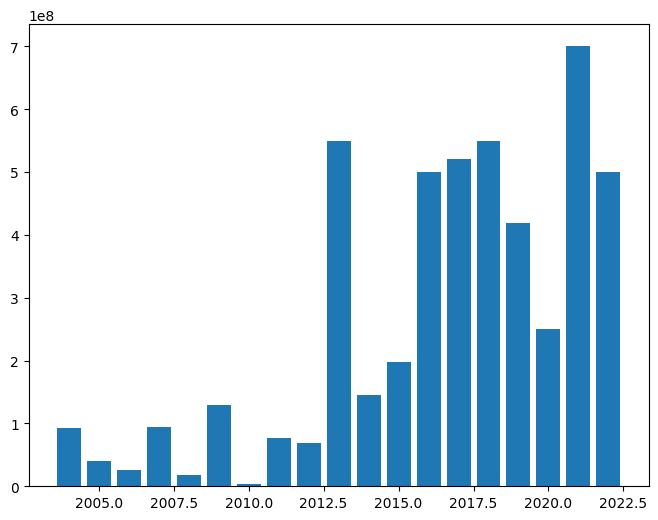

In [28]:
#change width of bar chart 
plt.figure(figsize=(8,6))
plt.bar(df["year"],df["records lost"])